In [2]:
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tfevents = pd.read_csv("all_training_logs_in_one_file.csv")
tfevents[tfevents.metric == "val_loss"]

,metric,value,step
0,val_loss,0.102727,0.0
1,val_loss,0.097317,1.0
2,val_loss,0.120188,2.0
3,val_loss,0.112736,3.0
4,val_loss,0.085646,4.0
...,...,...,...
136480,val_loss,0.106276,53287.0
136481,val_loss,0.130499,53288.0
136482,val_loss,0.102663,53289.0
136483,val_loss,0.099258,53290.0


/tmp/ipykernel_2493727/3225209409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfevents_val_loss[tfevents_val_loss > 0.2] = 0.2
/tmp/ipykernel_2493727/3225209409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfevents_val_loss[tfevents_val_loss < 0.07] = 0.07
/tmp/ipykernel_2493727/3225209409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfevents_val_loss[tfevents_val_loss < 0.07] = 0.07


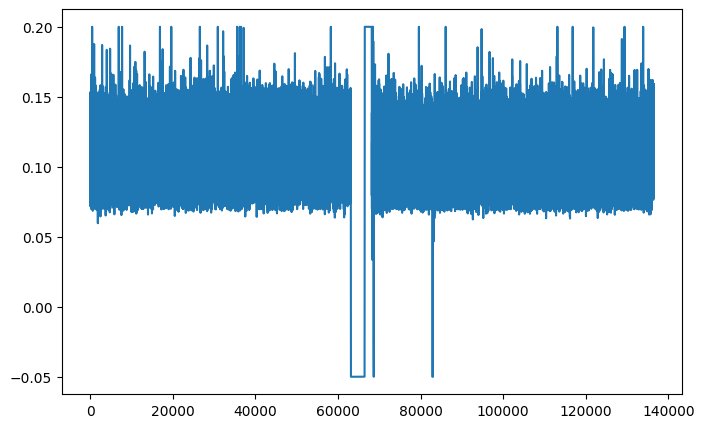

In [4]:
tfevents_val_loss = tfevents[tfevents.metric == "val_loss"]["value"]
tfevents_val_loss[tfevents_val_loss > 0.2] = 0.2
tfevents_val_loss[tfevents_val_loss < 0.07] = 0.07
spline_func = make_interp_spline(tfevents_val_loss.index, tfevents_val_loss.values, k=3)
X_ = np.linspace(tfevents_val_loss.index.min(), tfevents_val_loss.index.max(), len(tfevents_val_loss.values) * 100)
smoothed = spline_func(X_)

smoothed = np.where(smoothed > -0.05, smoothed, -0.05)
smoothed = np.where(smoothed < 0.2, smoothed, 0.2)

fig,ax = plt.subplots(figsize=(8,5))
ax.plot(X_, smoothed)


In [29]:
len(tfevents_val_loss.values), len(smoothed)

(131158, 655790)

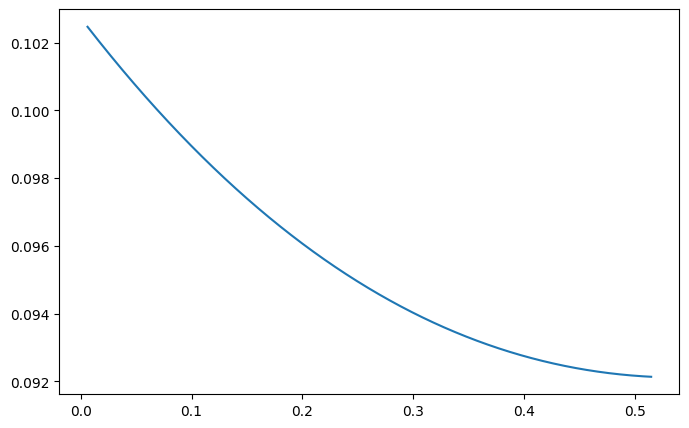

In [35]:


# plot = tfevents[tfevents.metric == "val_loss"].value.plot(title="Val loss")

In [ ]:
f = interp1d(df1.index, tfevents[tfevents.metric == "val_loss"]["value"],kind='cubic')
